Preprocessing Data

In [0]:
import pandas as pd
import numpy as np
import csv
from numpy import array
from numpy import loadtxt

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df = pd.read_csv('path of file for preprocecessing')

In [0]:
df.head(5)

,FROM,TO,DURATION,mu,Sigma,psi,LABEL
0,1,75,2,NaN,NaN,NaN,1
1,40,88,2,NaN,NaN,NaN,1
2,2,59,5,NaN,NaN,NaN,1
3,30,70,7,NaN,NaN,NaN,1
4,29,71,9,NaN,NaN,NaN,1


In [0]:
caller = np.zeros(101)
callee = np.zeros(101)

rows,cols = (101,101)
dur = [[0 for i in range(cols)] for j in range(rows)]
succ = [[0 for i in range(cols)] for j in range(rows)]
total = [[0 for i in range(cols)] for j in range(rows)]
for i in range(0,10000):
    k = df['FROM'][i]
    l = df['TO'][i]
    
#  caller callee calculation    
    caller[k] = caller[k] +1
    callee[l] = callee[l] +1
    
    
    duration = df['DURATION'][i]
    dur[k][l] = dur[k][l] + duration
    total[k][l] = total[k][l] + 1
    if duration > 0:
        succ[k][l] = succ[k][l] + 1
     

In [0]:
succ_call_rate = [[0 for i in range(cols)] for j in range(rows)]
average_taltime_percall = [[0 for i in range(cols)] for j in range(rows)]
for i in range (0,10000):
    k = df['FROM'][i]
    l = df['TO'][i]
    if succ[k][l]== 0:
        succ[k][l] = 1
    succ_call_rate[k][l] = (succ[k][l]/total[k][l])
    average_taltime_percall[k][l] = (dur[k][l]/succ[k][l])
    if callee[k] == 0:
        callee[k] = 1
    df['psi'][i] = caller[k]/callee[k]
    df['mu'][i] = succ_call_rate[k][l]
    df['Sigma'][i] = average_taltime_percall[k][l]



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
# To copy new features to new csv file

df1 = (df.to_csv('test(head).csv'))

In [0]:
import pandas as pd
import numpy as np
#from keras.layers import Dense 
#from keras.models import Sequential
#import keras
from sklearn.model_selection import train_test_split
#from keras.applications import MobileNet
from sklearn.svm import SVC
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneOut 
import glob
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
# from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV
from numpy import loadtxt
import matplotlib.pyplot as plt
from numpy import array
import csv
import matplotlib.pyplot as plt
import numpy 

mydelimeter = csv.excel()
mydelimeter.delimiter=","
import os,sys
from scipy import stats
import pickle

In [0]:
# save the model to disk
filename = '/content/drive/My Drive/Project(VOIP)/finalized_model1.sav'
# pickle.dump(model, open(filename, 'wb'))

In [0]:
# load the model from disk
model = pickle.load(open(filename, 'rb'))


## Loading data for training

In [0]:
# To load dataset(6_lakh.csv) 
dataset = loadtxt('/content/drive/My Drive/Project(VOIP)/6_lakh.csv',dtype='str', delimiter=',',usecols=(0,2,3,4,5,6))

# split into input (X) and output (y) variables

X = dataset[:,0:5]
y = dataset[:,5]


# Model(Random Forest Classifier)

In [0]:
# Model(Random Forest Classifier)
params = {
    'n_estimators':[10,30,50,100],
    'max_depth':[None,10,15,20],
}
model = RandomForestClassifier(n_estimators=3,max_depth=None,random_state=4,class_weight='balanced')

# To check best fit parameters in random forest classifier
model = GridSearchCV(model,params,cv=5)

In [0]:
# Training model
model.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=3, n_jobs=None,
                                              oob_score=False, random_state=4,
                                              verbose=0, warm_start=False),
             iid='

In [0]:
model.best_params_

{'max_depth': 10, 'n_estimators': 30}

In [7]:
# Training dataset accuracy
train_pred = model.predict(X)

accuracy_score(y,train_pred)*100

99.61816666666667

Graph train dataset

In [0]:
# To load dataset for graphs(6_lakh(head).csv)
dataset2 = pd.read_csv('/content/drive/My Drive/Project(VOIP)/6_lakh(head).csv')


In [9]:
dataset2.head()

,FROM,TO,DURATION,mu,Sigma,psi,LABEL
0,726,1609,126,1.0,126.0,0.842105,1
1,4252,147,77,1.0,357.5,2.652174,1
2,6996,4728,685,1.0,685.0,0.705128,1
3,505,1870,1,1.0,1.0,630.000000,0
4,3903,8342,149,1.0,149.0,0.778523,1


In [0]:
Total_spam_calls = dataset2[dataset2['LABEL'] == 0]['LABEL'].count()
Total_non_spam_calls = dataset2[dataset2['LABEL'] == 1]['LABEL'].count()

In [13]:
print("Total non-spam calls:",Total_non_spam_calls)
print("Total spam calls:",Total_spam_calls)

Total non-spam calls: 445336
Total spam calls: 154664


In [0]:
import seaborn as sns


In [0]:
%matplotlib inline

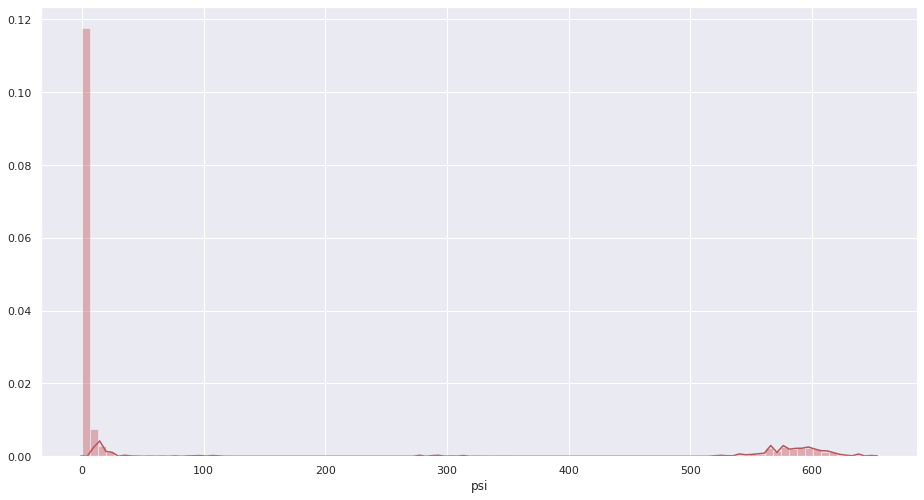

In [19]:
sns.distplot(dataset2['psi'],bins = 100,color ='r')
sns.set(rc={'figure.figsize':(15.7,7.27)},font_scale=1)

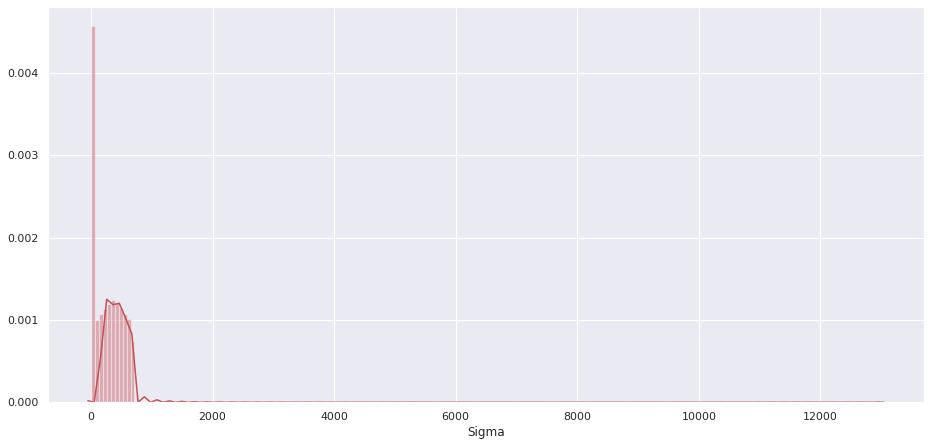

In [20]:
sns.distplot(dataset2['Sigma'],bins= 200,color ='r')
sns.set(rc={'figure.figsize':(15.7,7.27)},font_scale=1)

In [0]:
from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [22]:
print(__version__)

4.1.1


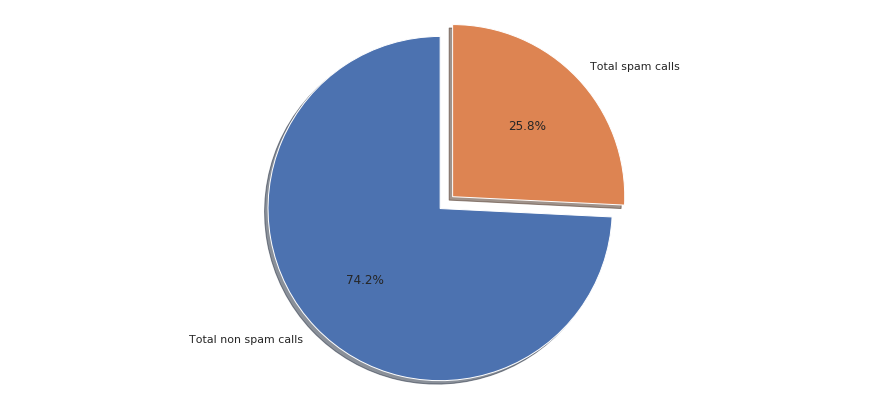

In [23]:

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Total non spam calls', 'Total spam calls', 
sizes = [Total_non_spam_calls, Total_spam_calls]
explode = (0.1, 0)  # only "explode" the 2nd slice (i.e. 'Spammers')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

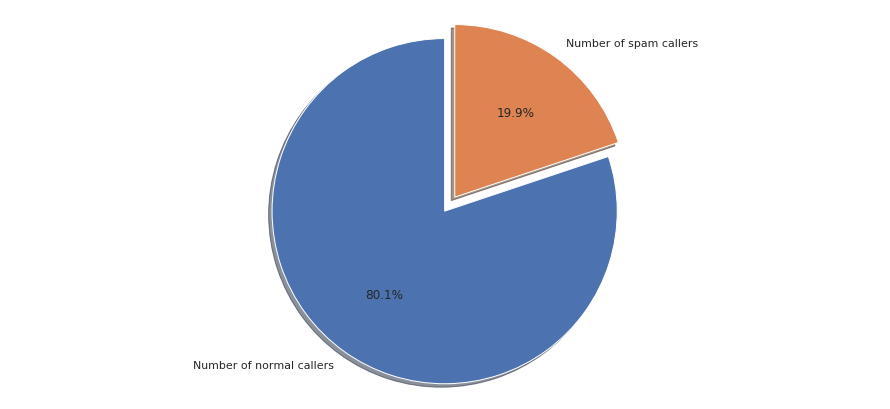

In [24]:
Number_of_normal_callers = dataset2[dataset2['LABEL']==1]['FROM'].nunique()
Number_of_spam_callers = dataset2[dataset2['LABEL']==0]['FROM'].nunique()


# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Number of normal callers', 'Number of spam callers', 
sizes = [Number_of_normal_callers, Number_of_spam_callers]
explode = (0.1, 0)  # only "explode" the 2nd slice (i.e. 'Spammers')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

***Loading*** **test Dataset**




In [0]:
# Test data loading(test.csv) 
dataset1 = loadtxt('/content/drive/My Drive/Project(VOIP)/test.csv',dtype='str', delimiter=',',usecols=(0,2,3,4,5,6))
X_test1 = dataset1[:,0:5]
Y_test1 = dataset1[:,5]

In [27]:
# Accuracy for test data

test_pred = model.predict(X_test1)
print("Test accuracy:",accuracy_score(Y_test1,test_pred)*100)

Test accuracy: 96.98030196980302


In [0]:
#Loading test dataset for graph(test(head).csv)
dataset3 = pd.read_csv('/content/drive/My Drive/Project(VOIP)/test(head).csv')

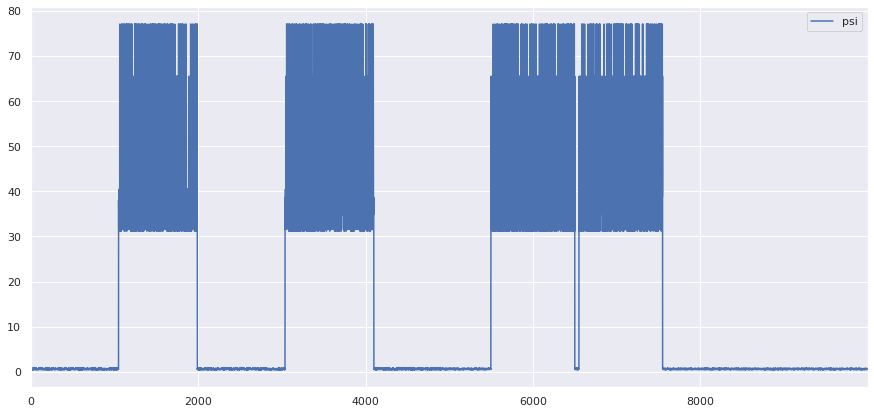

In [34]:
dataset3.iloc[0:10000].plot.line(y = 'psi',figsize=(15,7))
sns.set(rc={'figure.figsize':(15.7,7.27)},font_scale=1)

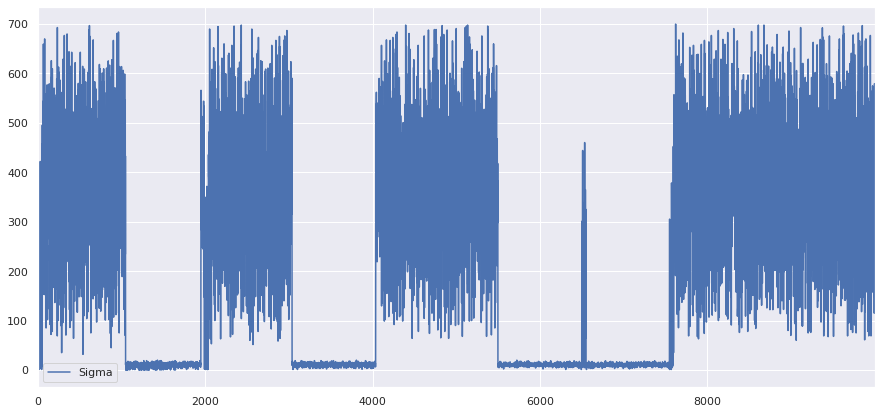

In [35]:
dataset3.iloc[0:10000].plot.line(y ='Sigma',figsize=(15,7),label = "Sigma")
sns.set(rc={'figure.figsize':(17.7,8.27)},font_scale=1)

In [0]:
Total_spam_calls = dataset3[dataset3['LABEL'] == 0]['LABEL'].count()
Total_non_spam_calls = dataset3[dataset3['LABEL'] == 1]['LABEL'].count()

In [0]:
Number_of_normal_callers = dataset3[dataset3['LABEL']==1]['FROM'].nunique()
Number_of_spam_callers = dataset3[dataset3['LABEL']==0]['FROM'].nunique()


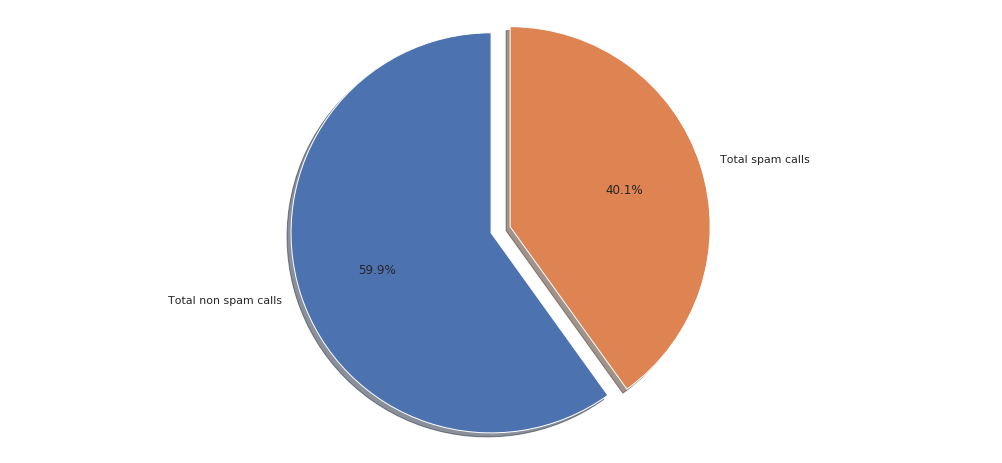

<Figure size 216x432 with 0 Axes>

In [38]:

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Total non spam calls', 'Total spam calls', 
sizes = [Total_non_spam_calls, Total_spam_calls]
explode = (0.1, 0)  # only "explode" the 2nd slice (i.e. 'Spammers')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()
fig= plt.figure(figsize=(3,6))

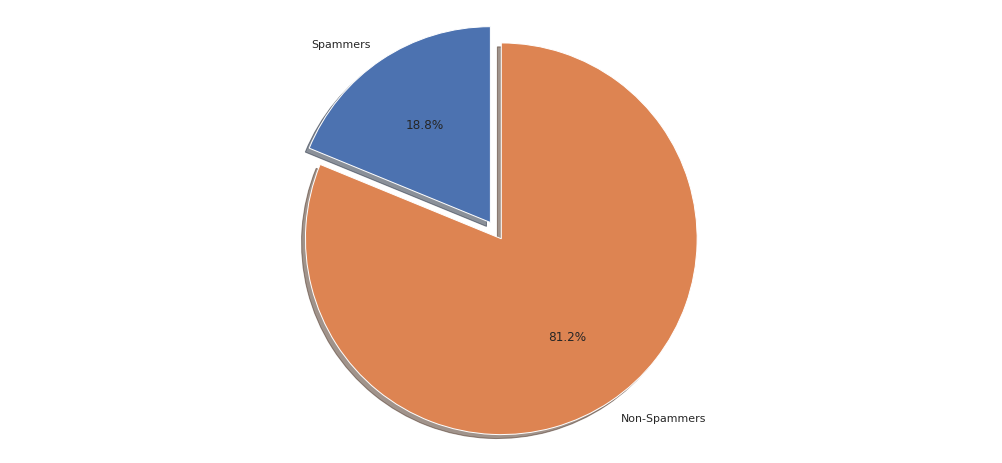

<Figure size 216x432 with 0 Axes>

In [39]:

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Spammers', 'Non-Spammers', 
sizes = [Number_of_spam_callers, Number_of_normal_callers]
explode = (0.1, 0)  # only "explode" the 2nd slice (i.e. 'Spammers')

fig1, ax1 = plt.subplots()
fig1= plt.figure(figsize=(3,6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


# Confusion matrix

[[3900  102]
 [ 200 5799]]
[0.97451274 0.96666111]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      4002
           1       0.98      0.97      0.97      5999

    accuracy                           0.97     10001
   macro avg       0.97      0.97      0.97     10001
weighted avg       0.97      0.97      0.97     10001



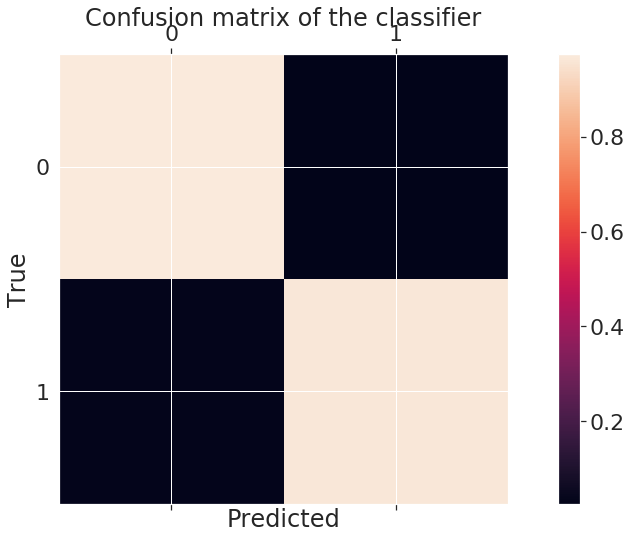

In [0]:
from sklearn.metrics import confusion_matrix
labels =['0','1']
cm = confusion_matrix(Y_test1,test_pred,labels)

print(cm)
cm = cm.astype(float)/cm.sum(axis =1)[:,np.newaxis]
values = cm.diagonal()
print(values)
print(classification_report(Y_test1,test_pred))
fig = plt.figure()

ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [0]:
print(cm)

[[0.97451274 0.02548726]
 [0.03333889 0.96666111]]


In [0]:
# print(classification_report(Y_test1,test_pred))